In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [16]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
tables = pd.read_html(
    url,
    match=re.compile(
        r"^Коефіцієнт народжуваності в регіонах України \(1950\—2019\)*$", re.I
    ),
)

# Припускаючи, що потрібна таблиця - перша на сторінці
df = tables[0]

In [17]:
# Вивести перші рядки таблиці
print(df.head())
print(df.columns)
# Визначте кількість рядків та стовпців
print(df.shape)

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —
Index(['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014',
       '2019'],
      dtype='object')
(28, 9)


In [18]:
# Замініть у таблиці значення "—" на NaN
df.replace("—", np.nan, inplace=True)
print(df.isnull().sum())
# print((df == "—").sum())

Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


In [19]:
# Визначте типи всіх стовпців
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [20]:
# Конвертація типів нечислових колонок у числові
for col in df.columns:
    if col != "Регіон":
        if df[col].dtype == "object":
            df[col] = pd.to_numeric(df[col], errors="coerce")

In [21]:
# Частка пропусків у кожній колонці
print(df.isnull().sum() / df.shape[0])

Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [22]:
# Видалення даних по всій країні (останній рядок)
df.drop(df.tail(1).index, inplace=True)

In [23]:
# Заміна відсутніх даних середніми значеннями
df.fillna(df.mean(numeric_only=True), inplace=True)
print(df)

               Регіон    1950        1960   1970  1990  2000  2012    2014  \
0                Крим  230.00  206.000000  160.0   130    73   126  111.44   
1           Вінницька  224.00  192.000000  142.0   124    84   112  109.00   
2           Волинська  247.00  250.000000  179.0   153   112   148  141.00   
3    Дніпропетровська  204.00  204.000000  151.0   123    71   112  111.00   
4            Донецька  271.00  214.000000  140.0   109    61    98   82.00   
5         Житомирська  261.00  223.000000  159.0   129    89   122  120.00   
6        Закарпатська  314.00  273.000000  207.0   168   115   151  146.00   
7          Запорізька  219.00  197.000000  150.0   124    71   106  106.00   
8   Івано-Франківська  243.00  248.000000  182.0   155   103   124  122.00   
9            Київська  204.00  189.000000  156.0   123    73   122  121.00   
10     Кіровоградська  216.00  171.000000  145.0   126    79   110  108.00   
11          Луганська  262.00  235.000000  144.0   116    62    

In [24]:
# Регіони з вищим рівнем народжуваності за середній у 2019 році
mean_birthrate_2019 = df["2019"].mean()
print(mean_birthrate_2019)
print(df["2019"].dtypes)
regions_higher_birthrate = df[df["2019"] > mean_birthrate_2019]["Регіон"].tolist()
print(regions_higher_birthrate)

80.17391304347828
float64
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [25]:
# Регіон з найвищою народжуваністю у 2014 році
highest_birthrate_2014_region = df[df["2014"] == df["2014"].max()]["Регіон"].iloc[0]
print(highest_birthrate_2014_region)

Рівненська


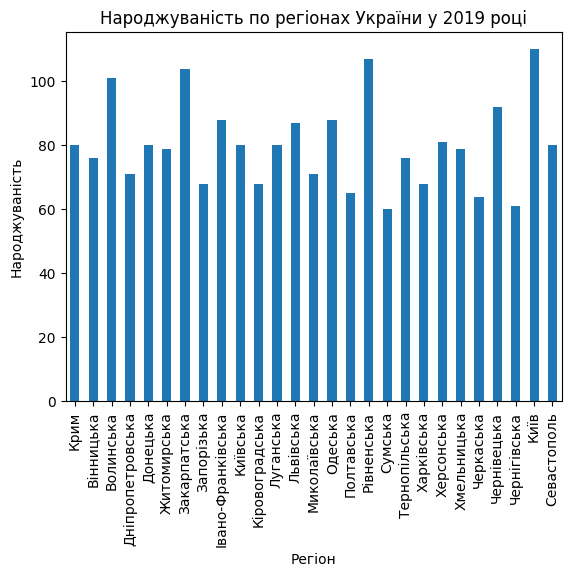

In [26]:
# Стовпчикова діаграма народжуваності по регіонах у 2019 році
df.set_index("Регіон")["2019"].plot(kind="bar")
plt.ylabel("Народжуваність")
plt.title("Народжуваність по регіонах України у 2019 році")
plt.show()

In [27]:
"""Графіки"""

'Графіки'

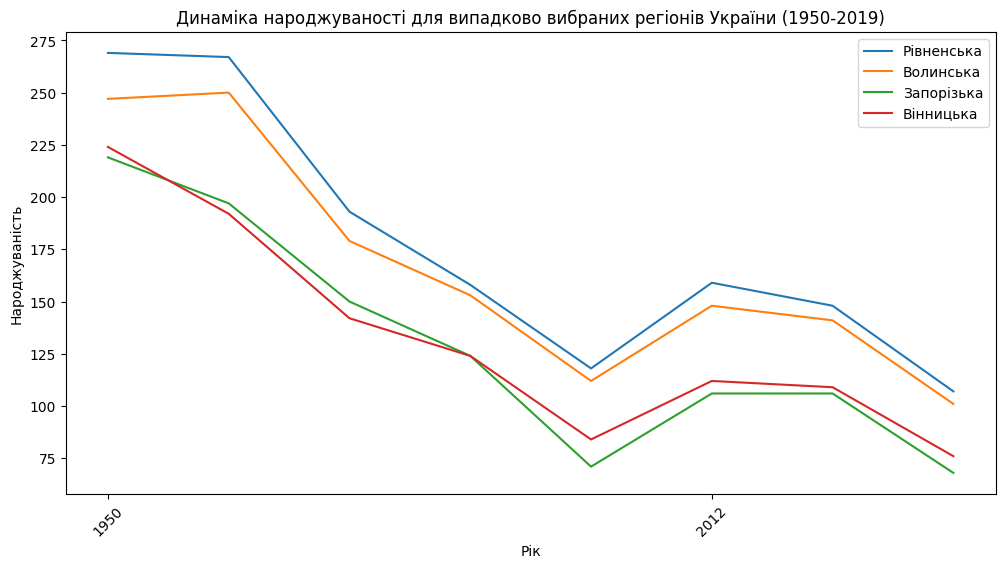

In [28]:
# Візуалізація динаміки народжуваності за роками для кожного регіону
random_regions = np.random.choice(df['Регіон'].unique(), 4, replace=False)

df_transposed = df.set_index("Регіон").T

plt.figure(figsize=(12, 6))

for region in random_regions:
    plt.plot(df_transposed.index, df_transposed[region], label=region)
plt.title("Динаміка народжуваності для випадково вибраних регіонів України (1950-2019)")
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.xticks(np.arange(0, len(df_transposed.index), 5), df_transposed.index[::5], rotation=45)
plt.legend()
plt.show()

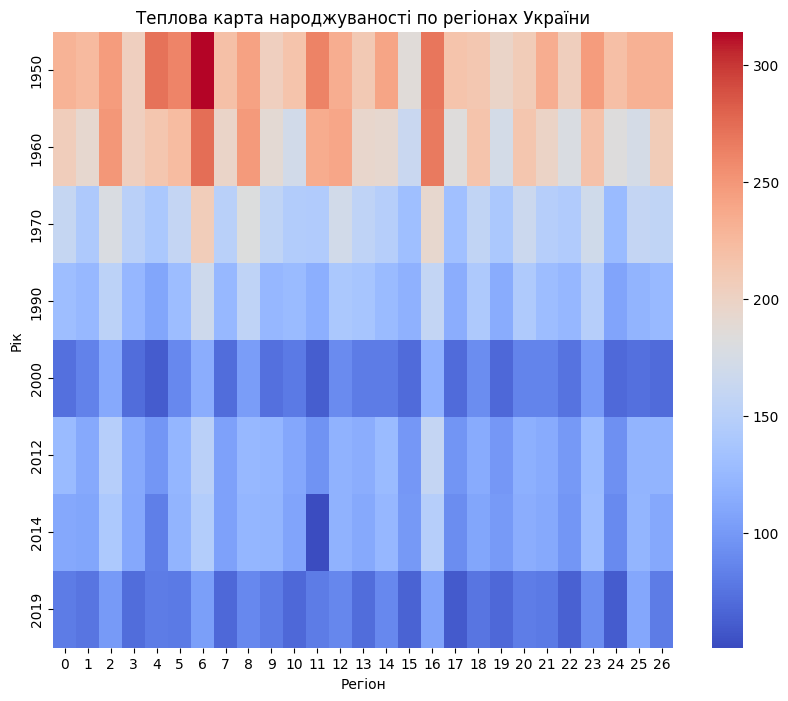

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop("Регіон", axis=1).T, cmap="coolwarm")
plt.title("Теплова карта народжуваності по регіонах України")
plt.xlabel("Регіон")
plt.ylabel("Рік")
plt.show()

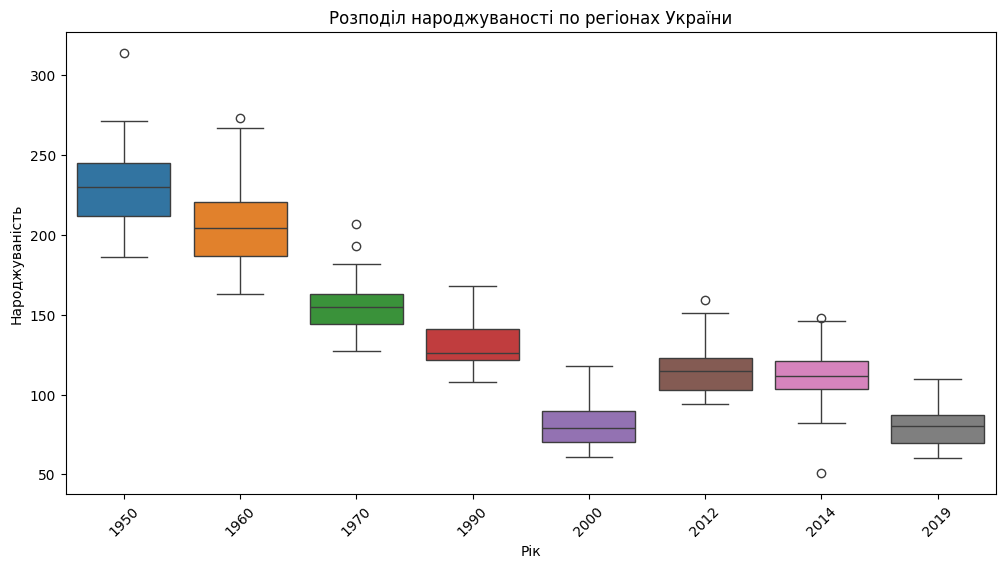

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop("Регіон", axis=1))
plt.title("Розподіл народжуваності по регіонах України")
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.xticks(rotation=45)
plt.show()

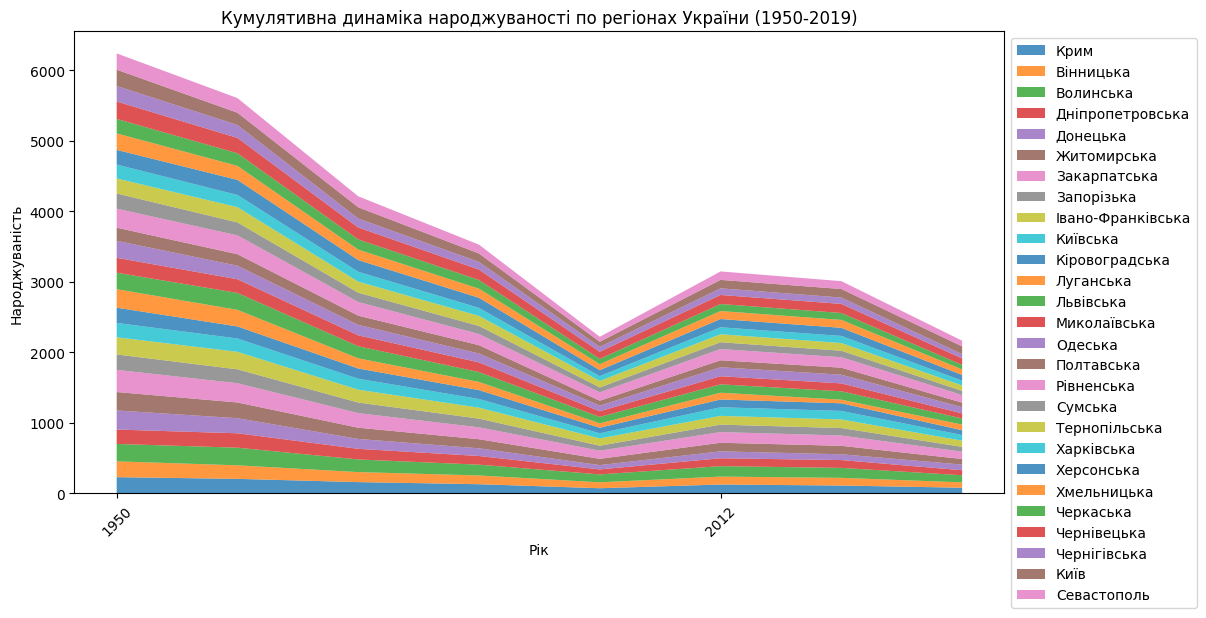

In [34]:
# Візуалізація динаміки народжуваності за роками для кожного регіону
df_transposed = df.set_index("Регіон").T
plt.figure(figsize=(12, 6))

# Кумулятивна площа для кожного регіону
plt.stackplot(df_transposed.index, [df_transposed[region] for region in df_transposed.columns],
              labels=df_transposed.columns, alpha=0.8)

plt.title("Кумулятивна динаміка народжуваності по регіонах України (1950-2019)")
plt.xlabel("Рік")
plt.ylabel("Народжуваність")
plt.xticks(np.arange(0, len(df_transposed.index), 5), df_transposed.index[::5], rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()